In [3]:
# read the file indexes/Index.NASDAQ.async.csv and convert it to a pandas dataframe
import pandas as pd
df = pd.read_csv('indexes/Index.NASDAQ.async.csv')
df

,_id,date,open,high,low,close,volume,change_percent,avg_vol_20d
0,65be9c5609cf1dbae294468f,1985-09-25,111.175,111.175,111.175,111.175,0,NaN,NaN
1,65be9c5609cf1dbae2944690,1985-09-26,110.640,110.640,110.640,110.640,0,-0.48,NaN
2,65be9c5609cf1dbae2944691,1985-09-27,110.640,110.640,110.640,110.640,0,0.00,NaN
3,65be9c5609cf1dbae2944692,1985-09-30,110.620,110.620,110.620,110.620,0,-0.02,NaN
4,65be9c5609cf1dbae2944693,1985-10-01,110.620,112.160,110.565,112.140,153160000,1.37,NaN
...,...,...,...,...,...,...,...,...,...
1745,65be9c5609cf1dbae2944d60,1992-08-19,300.440,301.745,298.170,298.315,312280000,-0.71,308996000.0
1746,65be9c5609cf1dbae2944d61,1992-08-20,298.315,299.750,297.125,299.425,310980000,0.37,308089000.0
1747,65be9c5609cf1dbae2944d62,1992-08-21,299.425,301.285,293.955,295.690,334600000,-1.25,308040000.0
1748,65be9c5609cf1dbae2944d63,1992-08-24,295.690,295.690,290.390,290.715,276920000,-1.68,309073000.0


In [4]:
# remove the _id column
df = df.drop('_id', axis=1)
df

,date,open,high,low,close,volume,change_percent,avg_vol_20d
0,1985-09-25,111.175,111.175,111.175,111.175,0,NaN,NaN
1,1985-09-26,110.640,110.640,110.640,110.640,0,-0.48,NaN
2,1985-09-27,110.640,110.640,110.640,110.640,0,0.00,NaN
3,1985-09-30,110.620,110.620,110.620,110.620,0,-0.02,NaN
4,1985-10-01,110.620,112.160,110.565,112.140,153160000,1.37,NaN
...,...,...,...,...,...,...,...,...
1745,1992-08-19,300.440,301.745,298.170,298.315,312280000,-0.71,308996000.0
1746,1992-08-20,298.315,299.750,297.125,299.425,310980000,0.37,308089000.0
1747,1992-08-21,299.425,301.285,293.955,295.690,334600000,-1.25,308040000.0
1748,1992-08-24,295.690,295.690,290.390,290.715,276920000,-1.68,309073000.0


KeyError: "None of ['date'] are in the columns"

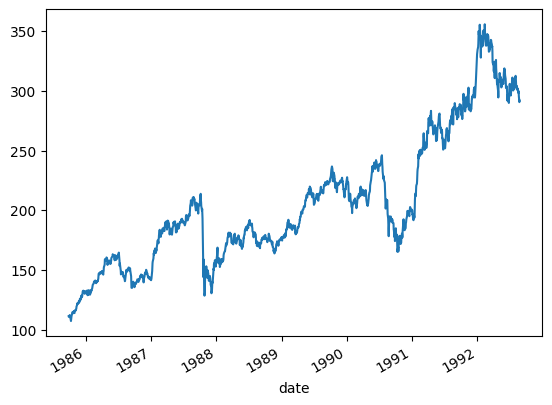

In [14]:
# create a plot chart that shows the price of the NASDAQ index over time, put the year on the x axis
import matplotlib.pyplot as plt
df['close'].plot()
# put the date on the x axis
df = df.set_index('date')